##  01.Environment Setup


In [17]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
import seaborn as sns

## 02.Load Dataset

In [19]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1','v2']]

    Rename columns

In [20]:
df.columns = ['label','message']

    Convert labels to 0/1

In [21]:
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [22]:
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


## 03.Visualizations

    Confusion Matrix Heatmap

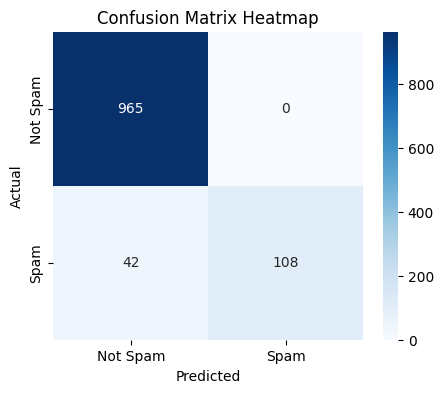

In [42]:
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam","Spam"], yticklabels=["Not Spam","Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

    Correlation Heatmap

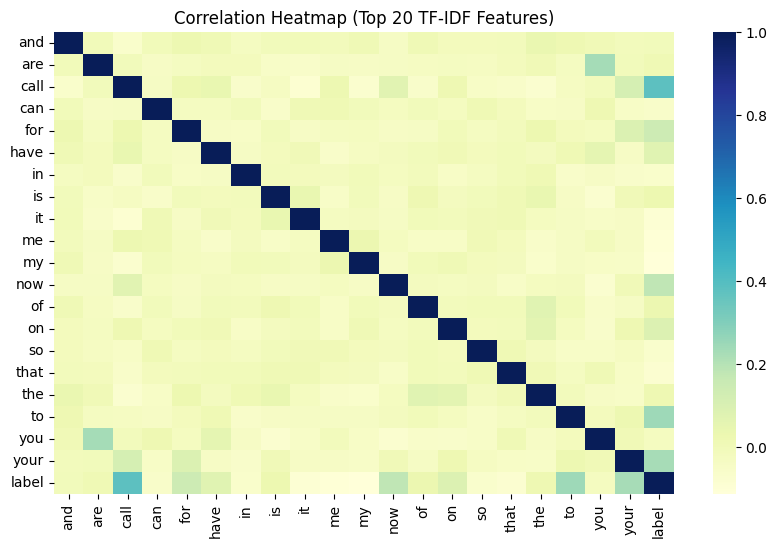

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20)  # pick top 20 words for visualization
X = vectorizer.fit_transform(df['message']).toarray()

X_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

X_df['label'] = df['label']

plt.figure(figsize=(10,6))
sns.heatmap(X_df.corr(), cmap="YlGnBu", annot=False)
plt.title("Correlation Heatmap (Top 20 TF-IDF Features)")
plt.show()

    WordCloud of Spam vs Ham Messages

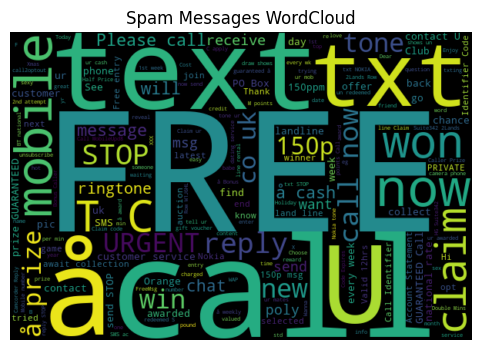

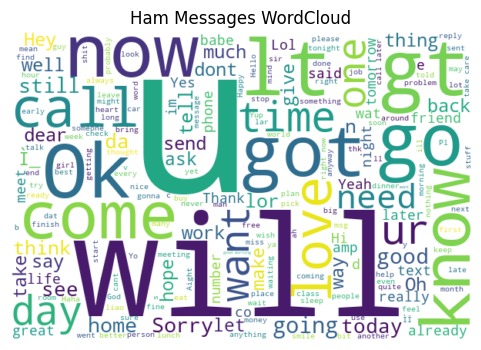

In [ ]:
from wordcloud import WordCloud


spam_words = " ".join(df[df['label']==1]['message'])
spam_wc = WordCloud(width=600, height=400, background_color="black").generate(spam_words)

plt.figure(figsize=(6,4))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Spam Messages WordCloud")
plt.show()


ham_words = " ".join(df[df['label']==0]['message'])
ham_wc = WordCloud(width=600, height=400, background_color="white").generate(ham_words)

plt.figure(figsize=(6,4))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Ham Messages WordCloud")
plt.show()

## 04.Preprocess Text (NLP)

    Clean the messages for the model

In [23]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = re.sub(r'\d', '', text)   # Remove numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_message'] = df['message'].apply(preprocess_text)
print(df.head())


   label                                            message  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


## 05.Feature Extraction (TF-IDF)

    Convert text into numerical features

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = df['label']


## 06.Train/Test Split

    Split dataset for training and evaluation

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


## 07.Train Machine Learning Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


     Naive Bayes classifier 

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)              
y_pred_nb = nb_model.predict(X_test)        


print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



    Logistic Regression

In [33]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)             
y_pred_lr = lr_model.predict(X_test)        


print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9497757847533632
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.95      0.66      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



    Random Forest

In [34]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)              
y_pred_rf = rf_model.predict(X_test)        


print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9757847533632287
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



      Support Vector Machine 

In [35]:
svm_model = SVC()
svm_model.fit(X_train, y_train)            
y_pred_svm = svm_model.predict(X_test)      


print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9748878923766816
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



## 08.Test on New Messages

In [36]:
def predict_spam(message):
    clean_msg = preprocess_text(message)
    vectorized_msg = vectorizer.transform([clean_msg])
    prediction = model.predict(vectorized_msg)
    return "🚫 Spam" if prediction[0] == 1 else "✅ Not Spam"

print(predict_spam("Congratulations! You won a free iPhone. Call now!"))
print(predict_spam("Hey, are we meeting tomorrow?"))



✅ Not Spam
✅ Not Spam


## 09.Save Model and Vectorizer

In [ ]:
import pickle

with open("spam_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
